In [1]:
import django
import os
import sys
import shutil

path='../'

source_file_path = f'{path}.env'

destination_file_path = '.'

shutil.copy(source_file_path, destination_file_path)

from dotenv import dotenv_values

_config = dotenv_values(".env")
_username = _config["username"]

session_file_path = f'{path}{_username}.session'

# shutil.copy(session_file_path, destination_file_path)


project_path = path  # Adjust this to your actual project path
sys.path.append(project_path)
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'oogway.settings')
django.setup()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'file_path.csv' with the actual path to your CSV file
file_path = 'test-all-strategies.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
# print(df.head())


In [3]:
# # Update the 'total_profit' column in the DataFrame based on the formula
# df['total_opening_orders'] = df['loss_count'] + df['profit_count']

# # Save the updated DataFrame back to the CSV file
# df.to_csv('test-all-strategies.csv', index=False)




In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'test-all-strategies.csv'

df = pd.read_csv(file_path)

# Filter the data for the required categories
filtered_df = df[df['channel_name'].isin(['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY'])]

# Create a new label column combining 'strategy_name' and 'close_tp'
filtered_df['label'] = filtered_df['strategy_name'] + '_' + filtered_df['close_tp'].astype(str)




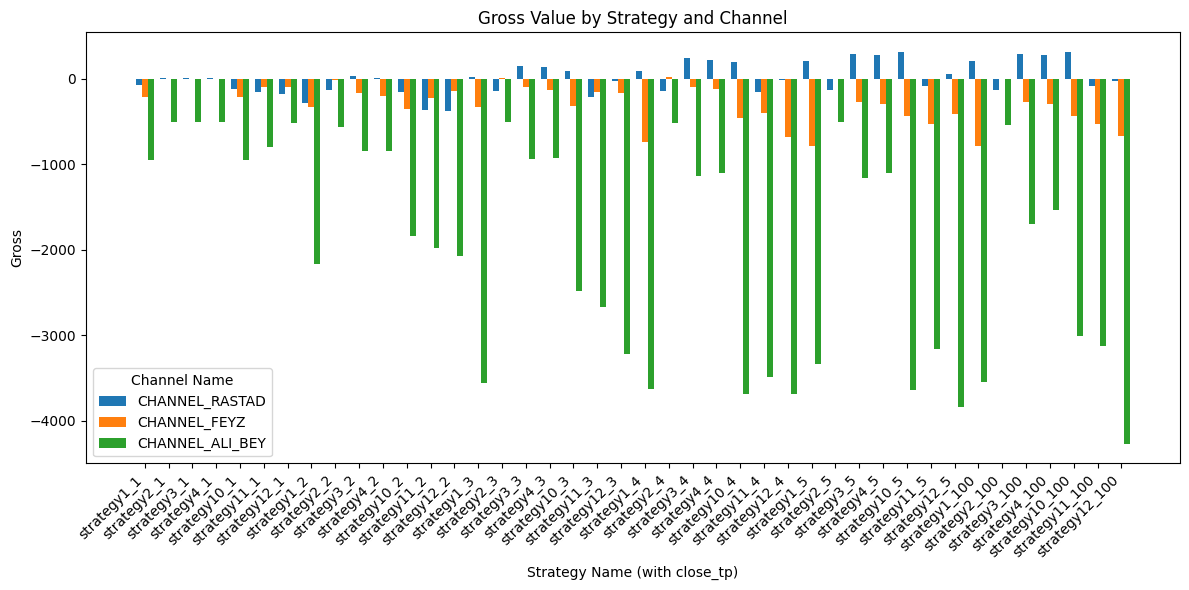

In [5]:
# Separate bar chart for each channel
import numpy as np

plt.figure(figsize=(12, 6))

# Unique labels for the x-axis
labels = filtered_df['label'].unique()

# Set width for grouped bars
bar_width = 0.25

# Create bar positions
x = np.arange(len(labels))

# Plot each channel with its own bars
for i, channel in enumerate(['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY']):
    channel_data = filtered_df[filtered_df['channel_name'] == channel]
    plt.bar(x + i * bar_width, channel_data['gross'], bar_width, label=channel)

# Customize the chart
plt.title('Gross Value by Strategy and Channel')
plt.xlabel('Strategy Name (with close_tp)')
plt.ylabel('Gross')
plt.xticks(x + bar_width, labels, rotation=45, ha='right')
plt.legend(title="Channel Name")
plt.tight_layout()

# Display the chart
plt.show()



C:\Users\F07\AppData\Local\Temp\ipykernel_32000\288406331.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Show legend for the y=0 line


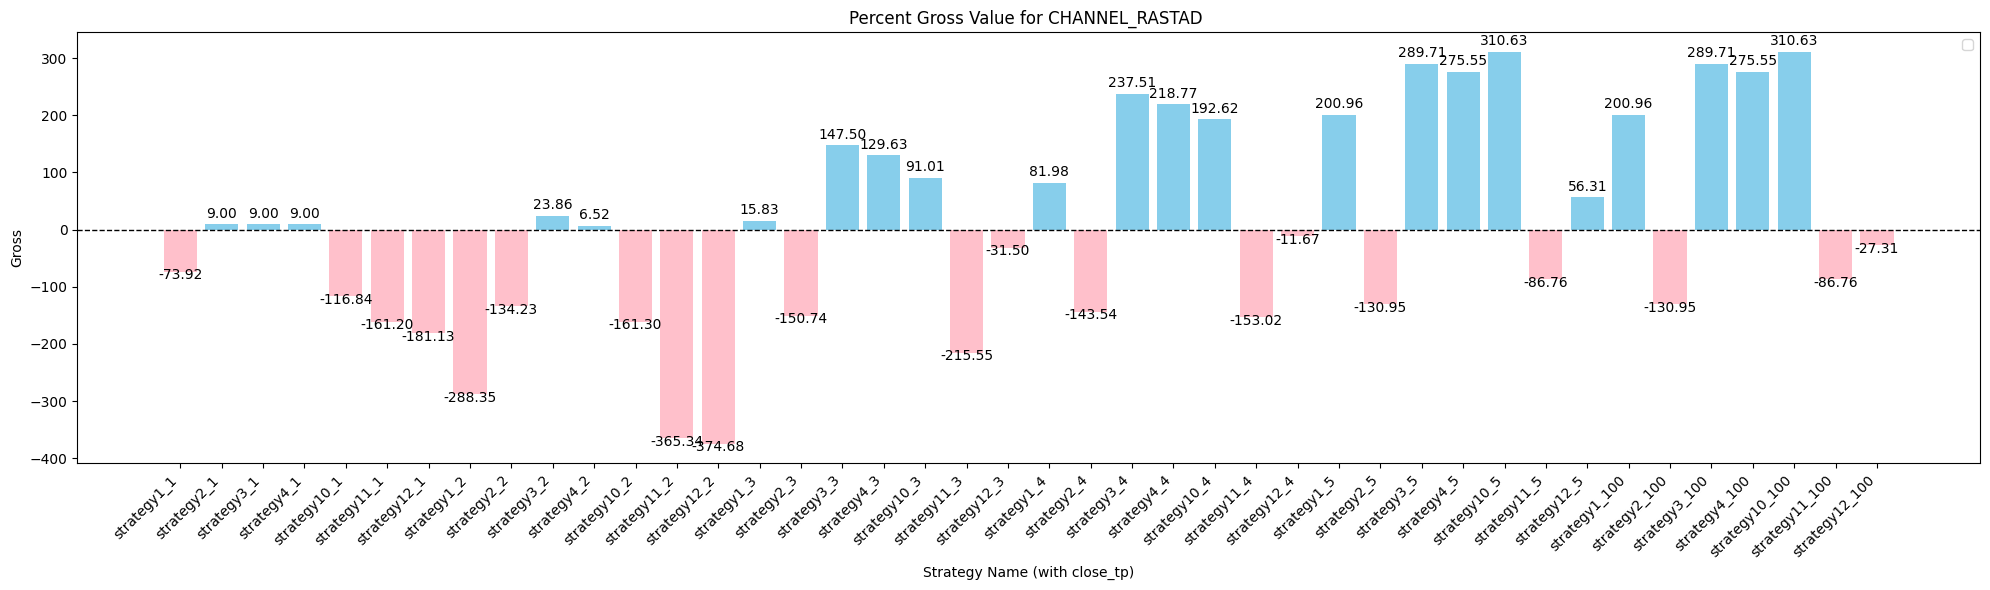

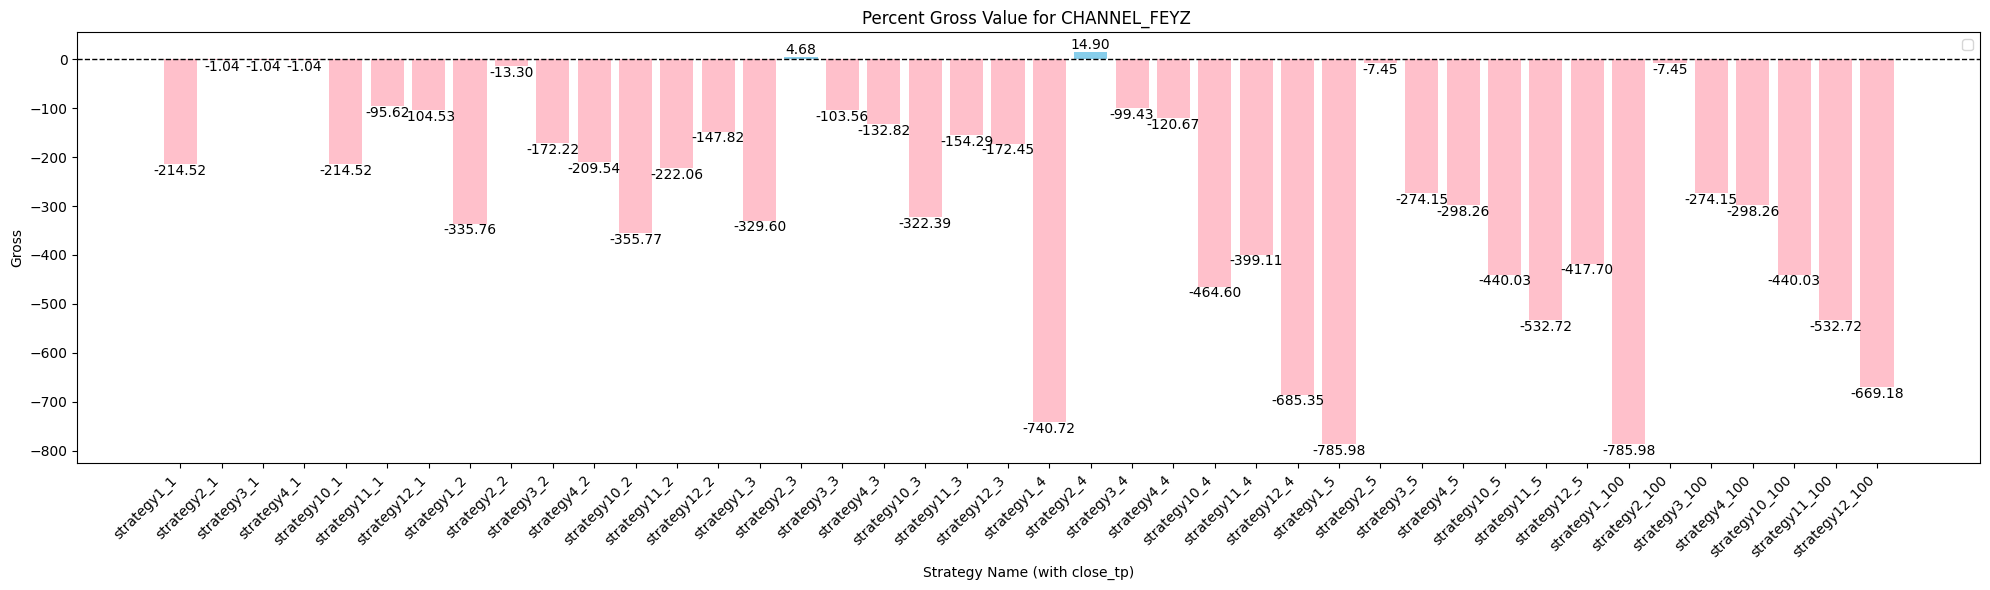

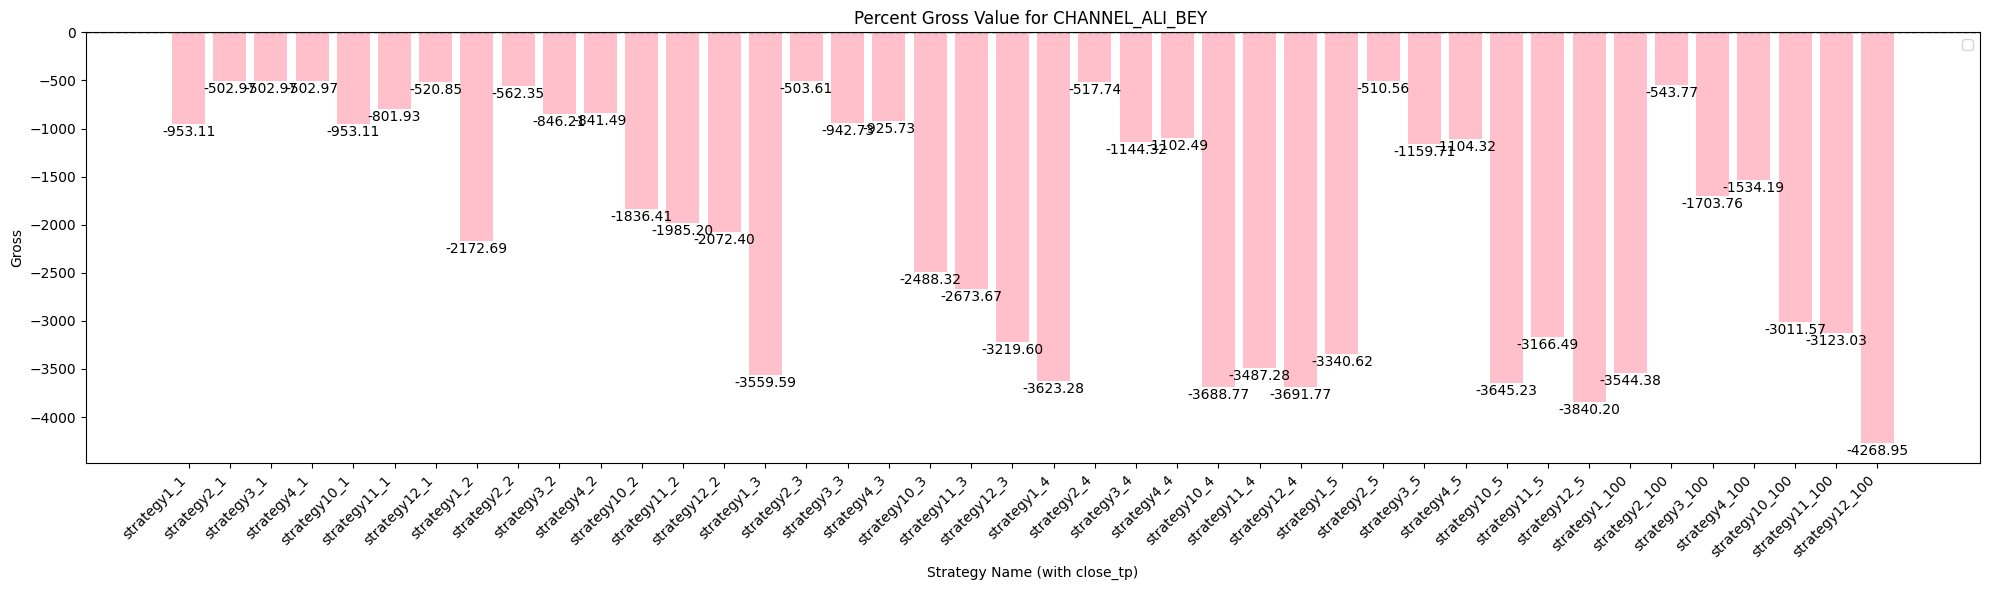

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(file_path)

# Filter the data for the required categories
filtered_df = df[df['channel_name'].isin(['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY'])]

# Create a new label column combining 'strategy_name' and 'close_tp'
filtered_df['label'] = filtered_df['strategy_name'] + '_' + filtered_df['close_tp'].astype(str)

# Define channels to plot
channels = ['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY']

# Generate a separate bar chart for each channel
for channel in channels:
    # Filter data for the current channel
    channel_data = filtered_df[filtered_df['channel_name'] == channel]
    
    # Separate positive and negative values
    colors = ['skyblue' if gross >= 0 else 'pink' for gross in channel_data['gross']]
    
    # Plot the bar chart
    plt.figure(figsize=(20, 6))
    bars = plt.bar(channel_data['label'], channel_data['gross'], color=colors)
    
    # Annotate each bar with its value
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height() + (0.02 * max(channel_data['gross'])),  # Adjust for better text placement
                 f'{bar.get_height():.2f}', 
                 ha='center', va='bottom' if bar.get_height() >= 0 else 'top', 
                 fontsize=10)
    
    # Add a horizontal line at y = 0
    plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
    
    # Add labels and titles
    plt.title(f'Percent Gross Value for {channel} ')
    plt.xlabel('Strategy Name (with close_tp)')
    plt.ylabel('Gross')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend()  # Show legend for the y=0 line
    plt.show()


In [8]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'test-all-strategies.csv'
data = pd.read_csv(file_path)

# Display rows where 'gross' is not negative
non_negative_gross = data[data['gross'] >= 0]

data.sort_values(by='gross',ascending=False)


,channel_name,strategy_name,close_tp,initial_money,total_opening_orders,total_loss,total_profit,gross,total_pending,my_free_money,my_total_money,profit_count,loss_count,pending_count,missed_count
39,CHANNEL_RASTAD,strategy10,100,1000,422,-2836.71,3147.34,310.63,25.000000,1052.66,1077.66,152,270,1,0
32,CHANNEL_RASTAD,strategy10,5,1000,422,-2836.71,3147.34,310.63,25.000000,1052.66,1077.66,152,270,1,0
30,CHANNEL_RASTAD,strategy3,5,1000,422,-2342.66,2632.37,289.71,25.000000,1047.43,1072.43,128,294,1,0
37,CHANNEL_RASTAD,strategy3,100,1000,422,-2342.66,2632.37,289.71,25.000000,1047.43,1072.43,128,294,1,0
31,CHANNEL_RASTAD,strategy4,5,1000,422,-2352.00,2627.55,275.55,25.000000,1043.89,1068.89,128,294,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,CHANNEL_ALI_BEY,strategy10,5,1000,495,-9666.59,6021.36,-3645.23,85.877225,2.82,88.69,171,321,3,84
109,CHANNEL_ALI_BEY,strategy10,4,1000,505,-9500.86,5812.09,-3688.77,57.010267,20.80,77.81,205,298,2,74
111,CHANNEL_ALI_BEY,strategy12,4,1000,420,-9599.86,5908.09,-3691.77,120.920787,10.25,131.17,196,219,5,59
118,CHANNEL_ALI_BEY,strategy12,5,1000,407,-10004.24,6164.04,-3840.20,95.008410,24.43,119.44,170,234,3,83
